# PEAKVI test

This jupyter notebook contains a test for the PEAKVI SCVI tool.

In [1]:
## Run just once
#import sys

#run_outside_colab=True
#!{sys.executable} -m pip install episcanpy
#!{sys.executable} -m pip install muon
#from scvi_colab import install
#install()

In [1]:
import scvi
import anndata
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import episcanpy.api as epi
import os 
#import muon as mu
# Import a module with ATAC-seq-related functions
#from muon import atac as ac

scvi.settings.seed = 333

sc.set_figure_params(figsize=(4, 4), frameon=False)

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

Global seed set to 0
/media/ag-cherrmann/cramirez/miniconda3/lib/python3.9/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))
Global seed set to 333


In [3]:
os.getcwd()
os.chdir('/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project/')
os.getcwd()

'/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project'

In [4]:
results_file = '/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project/analysis/atac_episcanpy.h5ad'

# Loading the ATAC-Seq

In [8]:
# Sample 2
#counts_16h_pIFN_polyC = scipy.io.mmread("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/2_16h_pIFN_polyC/outs/filtered_peak_bc_matrix/matrix.mtx").T.todense()
#regions_16h_pIFN_polyC = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/2_16h_pIFN_polyC/outs/filtered_peak_bc_matrix/peaks.bed", sep='\t', header=None, names=['chr','start','end'])
#cells_16h_pIFN_polyC = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/2_16h_pIFN_polyC/outs/filtered_peak_bc_matrix/barcodes.tsv", header=None, names=['barcodes'])

# Sample 3
#counts_16h_mIFN_dsRNA = scipy.io.mmread("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/3_16h_-IFN_dsRNA/outs/filtered_peak_bc_matrix/matrix.mtx").T.todense()
#regions_16h_mIFN_dsRNA = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/3_16h_-IFN_dsRNA/outs/filtered_peak_bc_matrix/peaks.bed", sep='\t', header=None, names=['chr','start','end'])
#cells_16h_mIFN_dsRNA = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/3_16h_-IFN_dsRNA/outs/filtered_peak_bc_matrix/barcodes.tsv", header=None, names=['barcodes'])

## Sample 6
#counts_3h_dsrna = scipy.io.mmread("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/6_3h_-IFN_dsRNA//outs/filtered_peak_bc_matrix/matrix.mtx").T.todense()
#regions_3h_dsrna = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/6_3h_-IFN_dsRNA//outs/filtered_peak_bc_matrix/peaks.bed", sep='\t', header=None, names=['chr','start','end'])
#cells_3h_dsrna = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/6_3h_-IFN_dsRNA//outs/filtered_peak_bc_matrix/barcodes.tsv", header=None, names=['barcodes'])

## Sample 7
#counts_3h_polyC = scipy.io.mmread("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/7_3h_-IFN_polyC/outs/filtered_peak_bc_matrix/matrix.mtx").T.todense()
#regions_3h_polyC = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/7_3h_-IFN_polyC/outs/filtered_peak_bc_matrix/peaks.bed", sep='\t', header=None, names=['chr','start','end'])
#cells_3h_polyC = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/counts_ATAC/7_3h_-IFN_polyC/outs/filtered_peak_bc_matrix/barcodes.tsv", header=None, names=['barcodes'])

In [58]:
## archer peaks
counts = scipy.io.mmread("/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project/data/peaks/matrix.mtx").T.todense()
regions = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project/data/peaks/peaks.bed", sep='\t', header=None, names=['chr','start','end', 'width', 'strand', 'idx'])
cells  = pd.read_csv("/media/sds-hd/sd21e005/binder_multiome/multiome_ifn_project/data/peaks/barcodes.tsv", sep='\t', header=None, names=['barcodes', 'Sample'])

In [59]:
adata  = anndata.AnnData(X=counts, obs=cells, var=regions)

In [60]:
cells

,barcodes,Sample
0,CCAACCCGTCCTTTAA-1,5_3h_pIFN_polyC
1,TTTCCGGGTAGCTAAT-1,5_3h_pIFN_polyC
2,GTTGGAGCAGGGAGGA-1,5_3h_pIFN_polyC
3,ATCCCGCGTTGCAATG-1,5_3h_pIFN_polyC
4,GGTTACCCAGTAATAG-1,5_3h_pIFN_polyC
...,...,...
3186,GCCACACAGCATTAGC-1,1_16h_pIFN_dsRNA
3187,GGACCGAAGGACTTAC-1,1_16h_pIFN_dsRNA
3188,GAACACAAGTTATGTG-1,1_16h_pIFN_dsRNA
3189,TCGTTAGCAACCTAAT-1,1_16h_pIFN_dsRNA


In [61]:
adata

AnnData object with n_obs × n_vars = 3191 × 166278
    obs: 'barcodes', 'Sample'
    var: 'chr', 'start', 'end', 'width', 'strand', 'idx'

# Concatenating the data 

In [64]:
counts

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [65]:
#adata_3h_dsrna = anndata.AnnData(X=counts_3h_dsrna, obs=cells_3h_dsrna, var=regions_3h_dsrna)
#adata_3h_dsrna.obs['Sample'] = '3h_-IFN_dsRNA'
#adata_3h_polyC = anndata.AnnData(X=counts_3h_polyC, obs=cells_3h_polyC, var=regions_3h_polyC)
#adata_3h_polyC.obs['Sample'] = '3h_-IFN_polyC'


#adata_16h_pIFN_polyC = anndata.AnnData(X=counts_16h_pIFN_polyC, obs=cells_16h_pIFN_polyC, var=regions_16h_pIFN_polyC)
#adata_16h_pIFN_polyC.obs['Sample'] = '16h_pIFN_polyC'
#adata_16h_mIFN_dsRNA = anndata.AnnData(X=counts_16h_mIFN_dsRNA, obs=cells_16h_mIFN_dsRNA, var=regions_16h_mIFN_dsRNA)
#adata_16h_mIFN_dsRNA.obs['Sample'] = '16h_-IFN_dsRNA'


#adata = anndata.concat([adata_3h_dsrna, adata_3h_polyC, adata_16h_pIFN_polyC, adata_16h_mIFN_dsRNA], merge='same')


# 

In [66]:
adata

AnnData object with n_obs × n_vars = 3191 × 166278
    obs: 'barcodes', 'Sample'
    var: 'chr', 'start', 'end', 'width', 'strand', 'idx'

In [67]:
print(adata.shape)
# compute the threshold: 1% of the cells
min_cells = int(adata.shape[0] * 0.01)
# in-place filtering of regions
sc.pp.filter_genes(adata, min_cells=min_cells)
print(adata.shape)

(3191, 166278)
(3191, 27014)


In [68]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

In [69]:
adata = adata[adata.obs['nb_features'] < 5000]

In [70]:
adata = adata.copy()

# PEAKVI workflow

In [71]:
scvi.model.PEAKVI.setup_anndata(adata)

In [72]:
pvi = scvi.model.PEAKVI(adata)
pvi.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 104/500:  21%|██        | 104/500 [03:18<12:37,  1.91s/it, loss=4.38e+07, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 2931.189. Signaling Trainer to stop.


In [73]:
pvi

PeakVI Model with params: 
n_hidden: 164, n_latent: 12, n_layers_encoder: 2, n_layers_decoder: 2 , dropout_rate: 0.1, 
latent_distribution: normal, deep injection: False, encode_covariates: False
Training status: Trained

In [74]:
## Saving the model

In [75]:
pvi.save("trained_model", overwrite=True)

## Getting a latent representation

In [76]:
latent = pvi.get_latent_representation()
adata.obsm["X_PeakVI"] = latent

In [77]:
# compute the k-nearest-neighbor graph that is used in both clustering and umap algorithms
sc.pp.neighbors(adata, use_rep="X_PeakVI")
# compute the umap
sc.tl.umap(adata, min_dist=0.1)
# cluster the space (we use a lower resolution to get fewer clusters than the default)
sc.tl.leiden(adata, key_added="cluster_pvi", resolution=0.2)

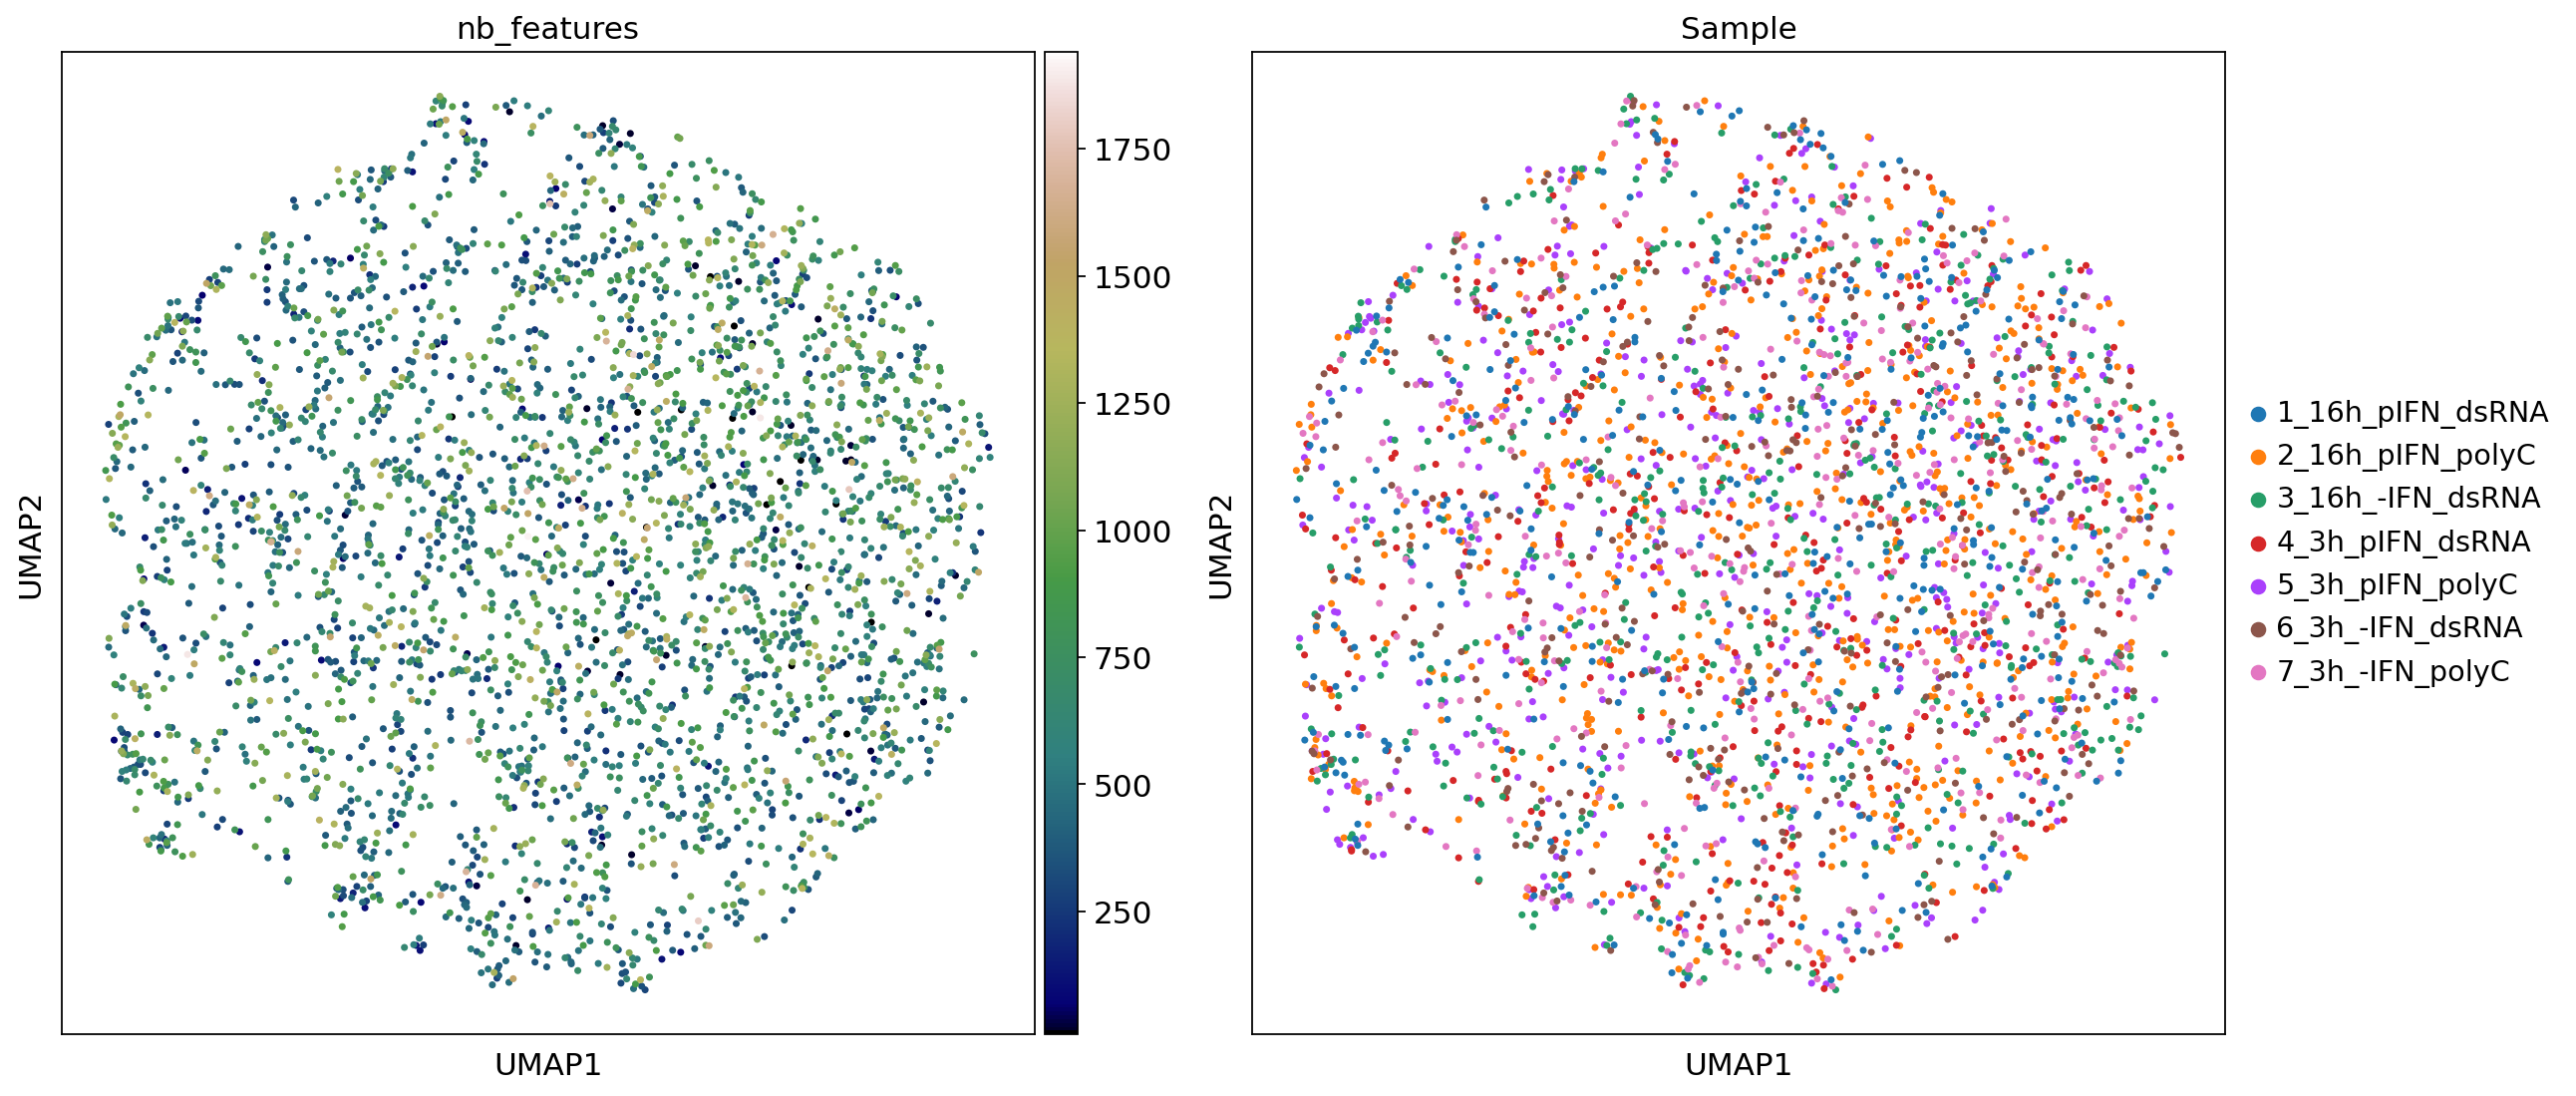

In [78]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)
sc.pl.umap(adata, color=['nb_features', 'Sample'], size=40, )